<a href="https://colab.research.google.com/github/tanmaygurav/Text-Summarization/blob/main/NLP_Project_Text_Summarization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project 
# Text summarization 


#Extractive summariztion

># Imports




In [ ]:
import re
import nltk
import string
import heapq
import math

nltk.download('punkt')
nltk.download('stopwords')

  # to clean html tags
!pip install goose3 

  # https://pypi.org/project/sumy/
  # simple python library to apply different algorithms for text summarization
!pip install sumy 

  # This tool utilizes the HuggingFace Pytorch transformers library to run extractive summarizations. 
  # This works by first embedding the sentences, then running a clustering algorithm, 
  # finding the sentences that are closest to the cluster's centroids.
!pip install bert-extractive-summarizer

  # for visualizing the data
from IPython.core.display import HTML
  # for cleaning text
from goose3 import Goose

  #sumy algorithm packages imports
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.luhn import LuhnSummarizer

  # bert package imports
from summarizer import Summarizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Inputs


In [ ]:
#single article at a time
url = 'https://en.wikipedia.org/wiki/Automatic_summarization'

#multiple article at a time
# article_list = ['https://en.wikipedia.org/wiki/Automatic_summarization',
#                 'https://en.wikipedia.org/wiki/Natural_language_processing',
#                 'https://en.wikipedia.org/wiki/Lemmatisation']

#Preprocessing

In [ ]:
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  
  stopwords = nltk.corpus.stopwords.words('english')
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)

  return formatted_text
  

#Summarize Function

In [ ]:
def summarize(text, percentage = 0):
  original_text = text
  formatted_text = preprocess(original_text)

  word_frequency = nltk.FreqDist(nltk.word_tokenize(formatted_text))
  highest_frequency = max(word_frequency.values())
  for word in word_frequency.keys():
    word_frequency[word] = (word_frequency[word] / highest_frequency)
  sentence_list = nltk.sent_tokenize(original_text)
  
  score_sentences = {}
  for sentence in sentence_list:
    for word in nltk.word_tokenize(sentence):
      if word in word_frequency.keys():
        if sentence not in score_sentences.keys():
          score_sentences[sentence] = word_frequency[word]
        else:
          score_sentences[sentence] += word_frequency[word]

  
  if percentage > 0:
    best_sentences = heapq.nlargest(int(len(sentence_list) * percentage), score_sentences, key=score_sentences.get)
  else:
    number_of_sentences=math.ceil((30*len(sentence_list))/100) # default 30 % sentences as best sentence 
    best_sentences = heapq.nlargest(number_of_sentences, score_sentences, key=score_sentences.get)

  return sentence_list, best_sentences, word_frequency, score_sentences


#Extracting texts from the Internet

In [ ]:
g = Goose()
article = g.extract(url)
formatted_article = preprocess(article.cleaned_text)
original_sentences = [sentence for sentence in nltk.sent_tokenize(article.cleaned_text)]

#Summary Call

In [ ]:
sentence_list, best_sentences, word_frequency, score_sentences = summarize(article.cleaned_text)

# Visualizing the summary in HTML

In [ ]:
def visualize(title, sentence_list, best_sentences):
  from IPython.core.display import HTML
  text = ''

  display(HTML(f'<h1>Summary - {title}</h1>'))
  for sentence in sentence_list:
    if sentence in best_sentences:
      text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += ' ' + sentence
  display(HTML(f""" {text} """))

#Simple Visualization

In [ ]:
visualize(article.title, sentence_list, best_sentences)

In [ ]:
# #visualize multiple articles at a time
# for url in article_list:
#   #print(article)
#   g = Goose()
#   article = g.extract(url)
#   sentence_list, best_sentences, _, _ = summarize(article.cleaned_text)
#   #print(len(sentence_list), len(best_sentences))
#   visualize(article.title, sentence_list, best_sentences)

#WordCloud

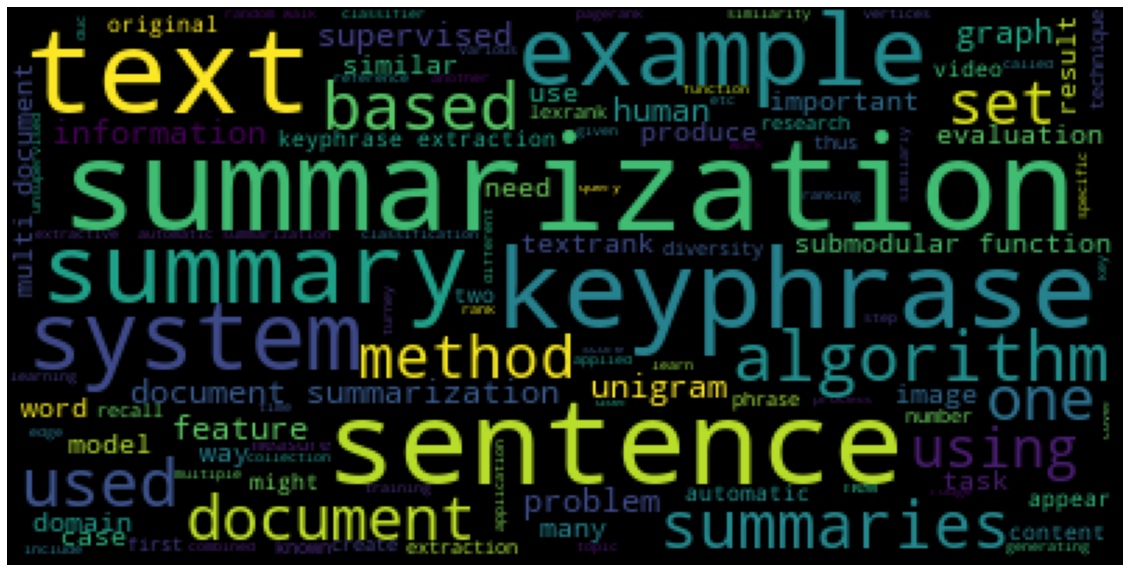

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(formatted_article));

#Sumy

In [ ]:
parser = PlaintextParser.from_string(article.cleaned_text, Tokenizer('english'))
summarizer = LuhnSummarizer()
number_of_sentences=math.ceil((30*len(sentence_list))/100) 
summary = summarizer(parser.document, number_of_sentences)

best_sentences = []
for sentence in summary:
  #print(sentence)
  best_sentences.append(str(sentence))

In [ ]:
visualize(article.title, original_sentences, best_sentences)

#BERT

https://pypi.org/project/bert-extractive-summarizer/

In [ ]:
summarizer = Summarizer()
summary = summarizer(article.cleaned_text,ratio=0.3)

summary_tokenized = [sentence for sentence in nltk.sent_tokenize(summary)]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
visualize(article.title, original_sentences, summary_tokenized)

#Abstractive summarization 

In [ ]:
from transformers import pipeline
import os

In [ ]:
#summarizer = pipeline("summarization")
# To use the t5-base model for summarization:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:
str(article.cleaned_text)

'Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content.\n\nIn addition to text, images and videos can also be summarized. Text summarization finds the most informative sentences in a document;[1] various methods of image summarization are the subject of ongoing research, with some looking to display the most representative images from a given collection or generating a video;[2][3][4] video summarization extracts the most important frames from the video content.[5]\n\nThere are two general approaches to automatic summarization: extraction and abstraction.\n\nHere, content is extracted from the original data, but the extracted content is not modified in any way. Examples of extracted content include key-phrases that can be used to "tag" or index a text document, or key sentences (including headings) that collectively comprise an abstract, an

In [ ]:
text = """One month after the United States began what has become a troubled rollout of a national COVID vaccination campaign, the effort is finally 
gathering real steam. Close to a million doses -- over 951,000, to be more exact -- made their way into the arms of Americans in the past 24 hours,
the U.S. Centers for Disease Control and Prevention reported Wednesday.That's the largest number of shots given in one day since the rollout began 
and a big jump from the previous day, when just under 340,000 doses were given, CBS News reported.That number is likely to jump quickly after 
the federal government on Tuesday gave states the OK to vaccinate anyone over 65 and said it would release all the doses of vaccine it has 
available for distribution. Meanwhile, a number of states have now opened mass vaccination sites in an effort to get larger numbers of people 
inoculated, CBS News reported."""

In [ ]:
summary_text1 = summarizer(text, max_length=100, do_sample=False)

In [ ]:
summary_text1[0]['summary_text']

"close to a million doses have been given in the past 24 hours, the cdc says . that's the largest number of shots given in one day since the rollout began . a number of states have opened mass vaccination sites to get more people inoculated ."

In [ ]:
summary_text = summarizer(article.cleaned_text, max_length=100, do_sample=False)

[{'summary_text': 'a number of supervised methods have been used for summarizing documents . a graph is constructed using a set of vertices that are connected to each other . the graph is then ranked based on the number of unigrams in the document . this is similar to how a supervised extraction works in the news domain .'}]


# Wikipedia text summary


In [ ]:
summary_text[0]['summary_text']

'a number of supervised methods have been used for summarizing documents . a graph is constructed using a set of vertices that are connected to each other . the graph is then ranked based on the number of unigrams in the document . this is similar to how a supervised extraction works in the news domain .'